# Tutorial III: Handwritten digit recognition in TF2

<p>
Bern Winter School on Machine Learning, 27-31 January 2020<br>
Prepared by Mykhailo Vladymyrov.
</p>

This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

This is a supplementary material describing the fully-connected neural network for handwritten digit recognition using TensorFlow 2.

## 1. Load necessary libraries

In [1]:
# if using google colab
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist

# We'll tell matplotlib to inline any drawn figures like so:
#%matplotlib inline
#plt.style.use('ggplot')

from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 5px;
    color: #0000aa;
    background-color: #cccccc;
} </style>""")

## 1. Load the data

First we will load the data: 60000 training images and 10000 images for validation. We will keep the images 2D and slatten them directly in the model.

We will as well keep the labels as class ID, intead of the one-hot encoding.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0


print ('train: data shape', x_train.shape, 'label shape', y_train.shape)
print ('test: data shape', x_test.shape, 'label shape', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
train: data shape (60000, 28, 28) label shape (60000,)
test: data shape (10000, 28, 28) label shape (10000,)


## 2. Bulding a neural network

The following creates a 'model'. It is an object containing the ML model itself - a simple 3-layer fully connected neural network, optimization parameters, as well as tha interface for model training.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # flatten the input
  tf.keras.layers.Dense(1500, activation='relu'),  # 1500 neurons, ReLU activation
  tf.keras.layers.Dense(128, activation='relu'),   # 128 neurons, ReLU activation
  tf.keras.layers.Dense(10, activation='softmax')  # 10 neurons. Final output with softmax activation: ~ probability.
])

model.compile(optimizer='adam',                        # Adam optimizer
              loss='sparse_categorical_crossentropy',  # objective function - cross-entropy, class-ID labels
              metrics=['accuracy'])                    # additional performance metrices

Model summary provides information about the model's layers and trainable parameters

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               192128    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,370,918
Trainable params: 1,370,918
Non-trainable params: 0
_________________________________________________________________


## 3. Model training

The `fit` function is the interface for model training. 
Here one can specify training and validation datasets, minibatch size, and the number of training epochs.

**Warining**: call to `model.fit` does NOT reinitialize trainable variables. Every time it continues from the previous state.

In [6]:
hist = model.fit(x=x_train, y=y_train,
                 epochs=25, batch_size=128, 
                 validation_data=[x_test, y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2042 - accuracy: 0.9396 - val_loss: 0.1191 - val_accuracy: 0.9635
Epoch 2/25
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0752 - accuracy: 0.9769 - val_loss: 0.0819 - val_accuracy: 0.9742
Epoch 3/25
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0473 - accuracy: 0.9845 - val_loss: 0.0641 - val_accuracy: 0.9791
Epoch 4/25
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 5/25
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0720 - val_accuracy: 0.9800
Epoch 6/25
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0972 - val_accuracy: 0.9755
Epoch 7/25
60000/60000 [==============================] 

The `fit` function returns the training history object (can be also obtained as `model.history` after training).

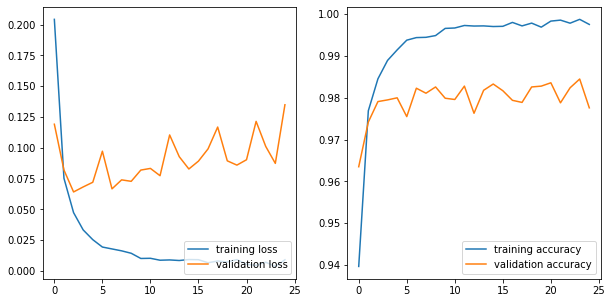

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

Current model performance can be evaluated on a dataset:

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.1349 - accuracy: 0.9776


[0.1348723222233993, 0.9776]

We cat test trained model on a image:


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

true lablel:  7 predicted:  7


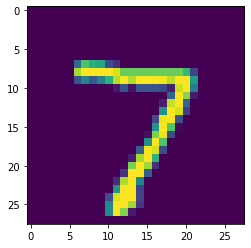

In [9]:
im_id = 0
y_pred = model(x_test[im_id:im_id+1])
print('true lablel: ', y_test[im_id], 'predicted: ', np.argmax(y_pred[0]) )
plt.imshow(x_test[im_id])

## 4. Inspecting trained variables

We can obtain the trained variables from model layers:

In [0]:
l = model.get_layer(index=1)  # get layer 1
w, b = l.weights  # weights are in fact both weights and bias

w = w.numpy()  # obtain the value as a numpy array
b = b.numpy()
print(w.shape, b.shape)

w = w.reshape((28,28,-1)).transpose((2, 0, 1))  # reshape to image size

(784, 1500) (1500,)


Let's visualize first 5:

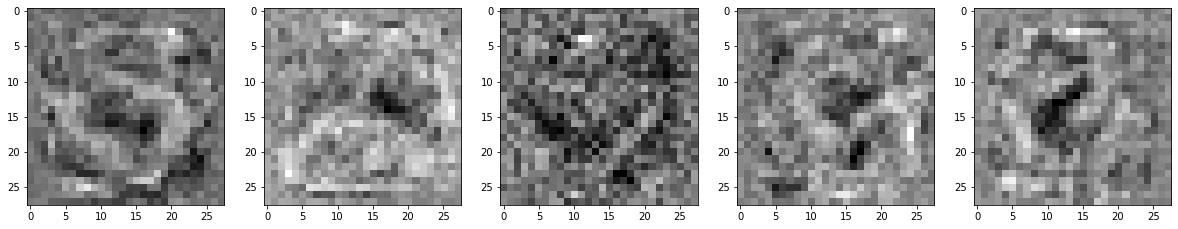

In [0]:
n = 5
fig, axs = plt.subplots(1, n, figsize=(4.1*n,4))
for i, wi in enumerate(w[:5]):
  axs[i].imshow(wi, cmap='gray')

## 5. Inspecting gradients

We can also evaluate the gradients of each output with respect to an input:

In [0]:
idx = 111
inp_v = x_train[idx:idx+1]  # use some image to compute gradients with respect to

inp = tf.constant(inp_v)  # create tf constant tensor
with tf.GradientTape() as tape:  # gradient tape for gradint evaluation
  tape.watch(inp)  # take inp as variable
  preds = model(inp) # evaluate model output

grads = tape.jacobian(preds, inp)  # evaluate d preds[i] / d inp[j]
print(grads.shape, '<- (Batch_preds, preds[i], Batch_inp, inp[y], inp[x])')
grads = grads.numpy()[0,:,0]

(1, 10, 1, 28, 28) <- (Batch_preds, preds[i], Batch_inp, inp[y], inp[x])


prediction: 3


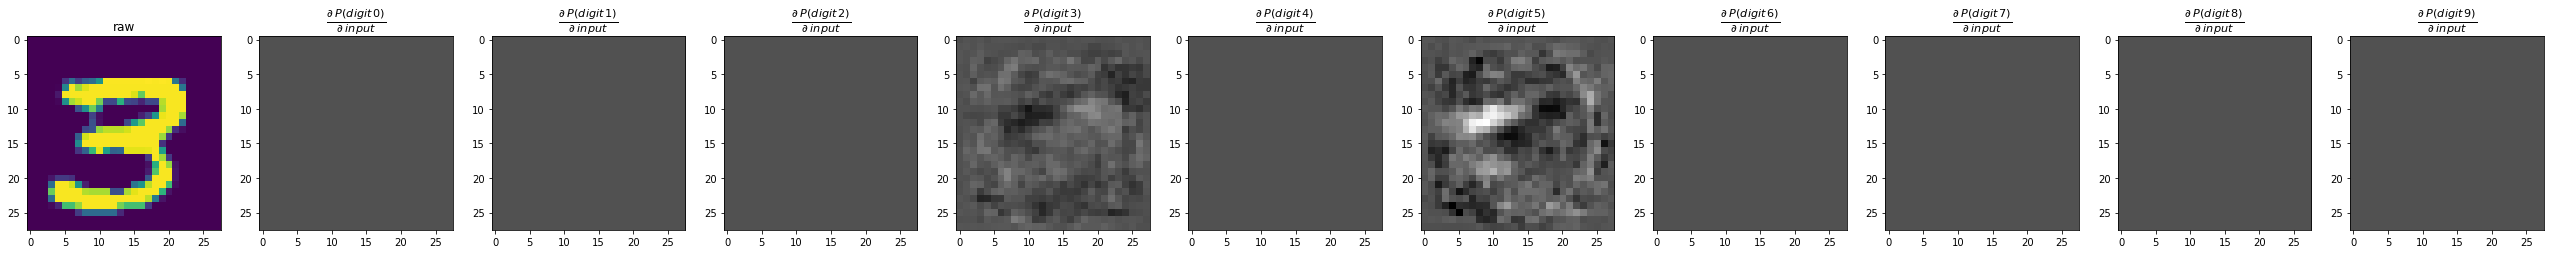

In [0]:
print('prediction:', np.argmax(preds[0]))
fig, axs = plt.subplots(1, 11, figsize=(4.1*11,4))
axs[0].imshow(inp_v[0])
axs[0].set_title('raw')
vmin,vmax = grads.min(), grads.max()
for i, g in enumerate(grads):
  axs[i+1].imshow(g, cmap='gray', vmin=vmin, vmax=vmax)
  axs[i+1].set_title(r'$\frac{\partial\;P(digit\,%d)}{\partial\;input}$' % i, fontdict={'size':16})